In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
import numpy as np
from rasterio.plot import show
from rasterio.mask import mask
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib import rcParams
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.cm import ScalarMappable
import glob

# 设置字体为 Times New Roman
rcParams['font.family'] = 'Arial'
rcParams['font.serif'] = ['Arial']
# 1. 读取世界地图 Shapefile 文件
world_map = gpd.read_file("../../../data/geo_dataset/worldMap/世界国家分布.shp")

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x00000242EDB5B420> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



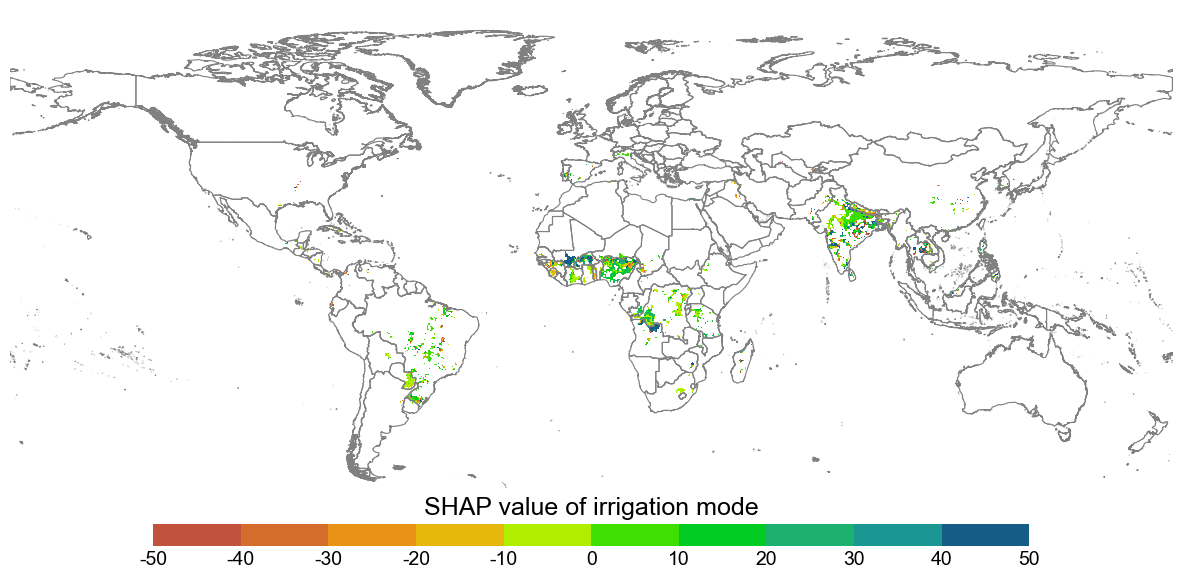

In [27]:
# feature_dict = {
#                    'TYPE_IN': {'range': (-20, 20), 'nickname': 'IN type'},
#                    'IN': {'range': (-100, 100), 'nickname': 'IN'},
#                    'IP': {'range': (-50, 50), 'nickname': 'IP'},
#                    'IK': {'range': (-50, 50), 'nickname': 'IK'},
#                    'OrgN': {'range': (-30, 30), 'nickname': 'ON'},
#                    'BC': {'range': (-50, 50), 'nickname': 'biochar'},
#                    'STRAW': {'range': (-20, 20), 'nickname': 'straw return'},
#                    'TILLAGE': {'range': (-40, 40), 'nickname': 'tillage'},
#                    'WM': {'range': (-25, 25), 'nickname': 'irrigation mode'},}
eco_feature_dict = {
                   'TYPE_IN': {'range': (-50, 50), 'nickname': 'IN type'},
                   'IN': {'range': (-50, 50), 'nickname': 'IN'},
                   'IP': {'range': (-50, 50), 'nickname': 'IP'},
                   'IK': {'range': (-50, 50), 'nickname': 'IK'},
                   'OrgN': {'range': (-50, 50), 'nickname': 'ON'},
                   'BC': {'range': (-50, 50), 'nickname': 'biochar'},
                   'STRAW': {'range': (-50, 50), 'nickname': 'straw return'},
                   'TILLAGE': {'range': (-50, 50), 'nickname': 'tillage'},
                   'WM': {'range': (-50, 50), 'nickname': 'irrigation mode'},}

env_feature_dict = {
                   'TYPE_IN': {'range': (-50, 50), 'nickname': 'IN type'},
                   'IN': {'range': (-50, 50), 'nickname': 'IN'},
                   'IP': {'range': (-50, 50), 'nickname': 'IP'},
                   'IK': {'range': (-50, 50), 'nickname': 'IK'},
                   'OrgN': {'range': (-50, 50), 'nickname': 'ON'},
                   'BC': {'range': (-50, 50), 'nickname': 'biochar'},
                   'STRAW': {'range': (-50, 50), 'nickname': 'straw return'},
                   'TILLAGE': {'range': (-50, 50), 'nickname': 'tillage'},
                   'WM': {'range': (-50, 50), 'nickname': 'irrigation mode'},}

feature_dict = {'eco': eco_feature_dict, 'env': env_feature_dict}

for map_type in ['eco', 'env']:
    for feature, feature_info in feature_dict[map_type].items():
        # 查找匹配的第一个tif文件
        tif_files = glob.glob(f"ArcGISPrj/Optimize Explanation/{map_type}_{feature}*.tif")
        if tif_files:
            first_tif = sorted(tif_files)[0]
            with rasterio.open(first_tif) as src:
                if src.crs != world_map.crs:
                    world_map = world_map.to_crs(src.crs)
                tiff_data, tiff_transform = mask(src, world_map.geometry, crop=True, nodata=np.nan)
                tiff_data = np.where(tiff_data < -9999, np.nan, tiff_data)
        else:
            raise FileNotFoundError(f"ArcGISPrj/Optimize Explanation/{map_type}_{feature}*.tif")
        
        # 3. 设置分类参数
        vmin, vmax = feature_info['range']
        n_classes = 10  # 改为10个分类
        bounds = np.linspace(vmin, vmax, n_classes+1)
        
        new_cmap = ["#c1533d", "#d46d2b", "#e89316", "#e8b70b", "#b0ee00", "#3fdf03", "#02cb23", "#1cb16f", "#1a9693", "#155c87"]
        cmap = ListedColormap(new_cmap)
        norm = BoundaryNorm(bounds, cmap.N)
        
        # 4. 绘制主地图（包含图例色带）
        fig, ax = plt.subplots(figsize=(15, 10))
        
        # 绘制国家边界（浅灰色）
        world_map.boundary.plot(ax=ax, edgecolor='gray', linewidth=0.8)
        
        # 绘制分类颜色栅格
        img = show(tiff_data[0], transform=tiff_transform, ax=ax, cmap=cmap, vmin=vmin, vmax=vmax, alpha=1)
        
        # 设置显示范围
        ax.set_ylim(-58, 90)
        ax.set_xlim(-180, 180)
        ax.set_axis_off()
    
        # 添加图例（色带）
        sm = ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.05, aspect=40, fraction=0.03, shrink=0.8)
        cb.set_ticks(bounds)
        cb.set_ticklabels([f"{round(x)}" for x in bounds])
        cb.outline.set_visible(False)
        cb.ax.tick_params(labelsize=14, length=0)
    
        # 添加图例标题在色带上方并居中
        # 
        legend_title = f"SHAP value of {feature_info['nickname']}"
        cb.ax.text(0.5, 1.2, legend_title, fontsize=18, ha='center', va='bottom', transform=cb.ax.transAxes)
    
        # 调整图例位置
        plt.subplots_adjust(bottom=0.15)
    
        plt.savefig(f"save/{map_type}/{feature}_{map_type}_shap.png", dpi=300, bbox_inches='tight', pad_inches=0)
        plt.close()

    

In [29]:
rcParams['font.family'] = 'Arial'
rcParams['font.serif'] = ['Arial']
eco_feature_dict = {'TYPE_IN': {'range': (-50, 50), 'nickname': 'IN'},
                    'IN': {'range': (-50, 50), 'nickname': 'IN'},
                   'N': {'range': (-50, 50), 'nickname': 'IN'},
                   'IP': {'range': (-50, 50), 'nickname': 'IP'},
                   'IK': {'range': (-50, 50), 'nickname': 'IK'},
                   'OrgN': {'range': (-50, 50), 'nickname': 'ON'},
                   'BC': {'range': (-50, 50), 'nickname': 'biochar'},
                   'STRAW': {'range': (-50, 50), 'nickname': 'straw return'},
                   'TILLAGE': {'range': (-50, 50), 'nickname': 'tillage'},
                   'WM': {'range': (-50, 50), 'nickname': 'irrigation mode'},}

env_feature_dict = {'TYPE_IN': {'range': (-50, 50), 'nickname': 'IN'},
                    'IN': {'range': (-50, 50), 'nickname': 'IN'},
                   'N': {'range': (-50, 50), 'nickname': 'IN'},
                   'IP': {'range': (-50, 50), 'nickname': 'IP'},
                   'IK': {'range': (-50, 50), 'nickname': 'IK'},
                   'OrgN': {'range': (-50, 50), 'nickname': 'ON'},
                   'BC': {'range': (-50, 50), 'nickname': 'biochar'},
                   'STRAW': {'range': (-50, 50), 'nickname': 'straw return'},
                   'TILLAGE': {'range': (-50, 50), 'nickname': 'tillage'},
                   'WM': {'range': (-50, 50), 'nickname': 'irrigation mode'},}

feature_dict = {'eco': eco_feature_dict, 'env': env_feature_dict}

isDraw = False
for map_type in ['eco', 'env']:
    for feature, feature_info in feature_dict[map_type].items():
        # 查找匹配的第一个tif文件
        tif_files = glob.glob(f"ArcGISPrj/Optimize Explanation/{map_type}_{feature}*.tif")
        if tif_files:
            first_tif = sorted(tif_files)[0]
            with rasterio.open(first_tif) as src:
                if src.crs != world_map.crs:
                    world_map = world_map.to_crs(src.crs)
                tiff_data, tiff_transform = mask(src, world_map.geometry, crop=True, nodata=np.nan)
                tiff_data = np.where(tiff_data < -9999, np.nan, tiff_data)
        else:
            raise FileNotFoundError(f"ArcGISPrj/Optimize Explanation/{map_type}_{feature}*.tif")
        
        # 3. 设置分类参数
        vmin, vmax = feature_info['range']
        n_classes = 10  # 改为10个分类
        bounds = np.linspace(vmin, vmax, n_classes+1)
        
        new_cmap = ["#c1533d", "#d46d2b", "#e89316", "#e8b70b", "#b0ee00", "#3fdf03", "#02cb23", "#1cb16f", "#1a9693", "#155c87"]
        cmap = ListedColormap(new_cmap)
        norm = BoundaryNorm(bounds, cmap.N)
        
        # 4. 绘制主地图（包含图例色带）
        fig, ax = plt.subplots(figsize=(15, 10))
        
        # 绘制国家边界（浅灰色）
        world_map.boundary.plot(ax=ax, edgecolor='gray', linewidth=0.8)
        
        # 绘制分类颜色栅格
        img = show(tiff_data[0], transform=tiff_transform, ax=ax, cmap=cmap, vmin=vmin, vmax=vmax, alpha=1)
        
        # 设置显示范围
        ax.set_ylim(-58, 90)
        ax.set_xlim(-180, 180)
        ax.set_axis_off()
    
        plt.savefig(f"save/{map_type}/{feature}_{map_type}_shap.png", dpi=300, bbox_inches='tight', pad_inches=0)
        plt.close()
        
        if not isDraw:
            # 创建单独的图例图片
            fig_legend, ax_legend = plt.subplots(figsize=(17.5, 0.5))
            sm = ScalarMappable(cmap=cmap, norm=norm)
            sm.set_array([])
            
            # 设置色带上下界为-50, 50
            sm.set_clim(vmin=-50, vmax=50)
            
            cb = fig_legend.colorbar(sm, cax=ax_legend, orientation='horizontal', 
                            aspect=40, pad=0.02)
            
            cb.set_ticks(bounds)
            cb.set_ticklabels([f"{round(x)}" for x in bounds])
            cb.outline.set_visible(False)
            cb.ax.tick_params(labelsize=24, length=0)
            
            # 添加图例标题
            legend_title = f"Ratio of SHAP contribution (%)"
            ax_legend.set_title(legend_title, fontsize=28, pad=10)
            
            plt.savefig(f"save/{map_type}/{map_type}_legend.png", dpi=300, bbox_inches='tight', pad_inches=0)
            plt.close(fig_legend)
            isDraw = True

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.cm import ScalarMappable
from matplotlib.patches import Rectangle
import rasterio
from rasterio.mask import mask
import glob
from matplotlib import rcParams
from tqdm import tqdm

# 设置字体
rcParams['font.family'] = 'Arial'
rcParams['font.serif'] = ['Arial']

# 定义特征字典
eco_feature_dict = {
    'addition': {'range': (-50, 50), 'nickname': 'Straw and biochar', 'labelal': 'c', 'color': '#F7F1B4'},
    'fertilizer': {'range': (-50, 50), 'nickname': 'Fertilizer', 'labelal': 'a', 'color': '#F099A7'},
    'surface': {'range': (-50, 50), 'nickname': 'Irrigation and tillage', 'labelal': 'e', 'color': '#BDB4F7'}
}

env_feature_dict = {
    'addition': {'range': (-50, 50), 'nickname': 'Straw and biochar', 'labelal': 'd', 'color': '#F7F1B4'},
    'fertilizer': {'range': (-50, 50), 'nickname': 'Fertilizer', 'labelal': 'b', 'color': '#F099A7'},
    'surface': {'range': (-50, 50), 'nickname': 'Irrigation and tillage', 'labelal': 'f', 'color': '#BDB4F7'}
}


feature_dict = {'eco': eco_feature_dict, 'env': env_feature_dict}

isDraw = False
for map_type in ['eco', 'env']:
    for feature, feature_info in feature_dict[map_type].items():
        # 查找匹配的第一个tif文件
        tif_files = glob.glob(f"ArcGISPrj/tiffs/{map_type}/{map_type}_ratio_{feature}*.tif")
        if tif_files:
            first_tif = sorted(tif_files)[0]
            with rasterio.open(first_tif) as src:
                # 假设world_map已定义
                if 'world_map' in locals() and src.crs != world_map.crs:
                    world_map = world_map.to_crs(src.crs)
                # 假设world_map已定义
                tiff_data, tiff_transform = mask(src, world_map.geometry, crop=True, nodata=np.nan, filled=True)
                tiff_data = np.where(tiff_data < -999999, np.nan, tiff_data)
        else:
            raise FileNotFoundError(f"ArcGISPrj/tiffs/{map_type}/{map_type}_{feature}*.tif")
        
        # 设置分类参数
        vmin, vmax = feature_info['range']
        n_classes = 10  # 10个分类
        bounds = np.linspace(vmin, vmax, n_classes+1)
        
        new_cmap = ["#c1533d", "#d46d2b", "#e89316", "#e8b70b", "#b0ee00", 
                   "#3fdf03", "#02cb23", "#1cb16f", "#1a9693", "#155c87"]
        cmap = ListedColormap(new_cmap)
        norm = BoundaryNorm(bounds, cmap.N)
        
        # 绘制主地图（包含图例色带）
        fig, ax = plt.subplots(figsize=(15, 10))
        
        # 绘制国家边界（浅灰色）
        world_map.boundary.plot(ax=ax, edgecolor='gray', linewidth=0.8)
        
        # 绘制分类颜色栅格
        img = show(tiff_data[0], transform=tiff_transform, ax=ax, cmap=cmap, vmin=vmin, vmax=vmax, alpha=1)
        
        # 添加标签文本
        plt.text(0.02, 0.98, feature_info['labelal'], transform=plt.gca().transAxes, 
                fontsize=40, fontweight='bold', 
                verticalalignment='center', horizontalalignment='center')
        
        # # 添加矩形背景
        # rect = Rectangle((0.05, 1.18),  # 左下角坐标
        #                 0.9,            # 宽度（略小于图片宽度）
        #                 0.15,           # 高度（略高于图标）
        #                 facecolor=feature_info['color'], 
        #                 edgecolor='none',  # 无边框
        #                 transform=ax.transAxes)
        # ax.add_patch(rect)
        
        # # 添加nickname文本（位于矩形中央）
        # plt.text(0.5, 1.05, feature_info['nickname'], transform=ax.transAxes,
        #         fontsize=50,  # 与图标同字体大小
        #         color='black',
        #         fontweight='normal',  # 不加粗
        #         verticalalignment='center', 
        #         horizontalalignment='center')
        
        # 设置显示范围
        ax.set_ylim(-58, 90)
        ax.set_xlim(-180, 180)
        ax.set_axis_off()
    
        plt.savefig(f"save/total/{feature}_ratio_{map_type}_shap.png", dpi=1000, bbox_inches='tight', pad_inches=0)
        plt.close()
        
        if not isDraw:
            # 创建单独的图例图片
            fig_legend, ax_legend = plt.subplots(figsize=(30, 0.7))
            sm = ScalarMappable(cmap=cmap, norm=norm)
            sm.set_array([])
            
            # 设置色带上下界为-50, 50
            sm.set_clim(vmin=-50, vmax=50)
            
            cb = fig_legend.colorbar(sm, cax=ax_legend, orientation='horizontal', 
                            aspect=40, pad=0.02)
            
            cb.set_ticks(bounds)
            cb.set_ticklabels([f"{round(x)}" for x in bounds])
            cb.outline.set_visible(False)
            cb.ax.tick_params(labelsize=60, length=0)
            
            # 添加图例标题
            legend_title = f"Ratio of SHAP contribution (%)"
            ax_legend.set_title(legend_title, fontsize=60, pad=10)
            
            plt.savefig(f"save/total/{map_type}_legend.png", dpi=1000, bbox_inches='tight', pad_inches=0)
            plt.close(fig_legend)
            isDraw = True

In [23]:
# 3. 关键参数配置（与主图对齐）
main_fig_height = 8  # 主图 figsize=(15,10) 中的高度，确保矩形图与主图等高
font_size = 50        # 与主图标注字体大小一致
text_pad = 1        # 矩形宽度比字体宽出的比例（避免文字紧贴边框）


# 4. 循环生成每个特征的标签矩形图
for map_type in ['eco', 'env']:
    for feature, feature_info in feature_dict[map_type].items():
        # 创建画布：高度与主图一致（10），宽度仅略宽于字体（通过字体大小动态适配）
        fig, ax = plt.subplots(figsize=(1.4, main_fig_height))  # 宽度2足够容纳旋转后的60号字体
        
        # 获取当前特征的配置
        rect_color = feature_info['color']    # 矩形颜色（匹配特征字典）
        nickname = feature_info['nickname']   # 要显示的文本
        
        # 绘制无边框矩形（占据画布核心区域，宽度略宽于字体）
        # 坐标说明：transAxes 是相对画布的坐标（0,0为左下角，1,1为右上角）
        rect = Rectangle(
            xy=(0, 0),    # 左下角x：居中左移，留出左侧余量；y：从底部开始
            width=text_pad,              # 宽度：仅略宽于字体（通过text_pad控制）
            height=1,                    # 高度：充满整个画布（与主图等高）
            facecolor=rect_color,        # 填充色：特征字典颜色
            edgecolor='none'             # 无边框
        )
        ax.add_patch(rect)
        
        # 绘制逆时针旋转90度的nickname（居中显示）
        ax.text(
            x=0.5,                       # x轴居中
            y=0.5,                       # y轴居中
            s=nickname,
            fontsize=font_size,
            color='black',
            fontweight='normal',         # 不加粗（与需求一致）
            ha='center',                 # 水平居中
            va='center',                 # 垂直居中
            rotation=90,                 # 逆时针旋转90度（rotation=90即逆时针）
            rotation_mode='anchor'       # 基于锚点旋转（避免文字偏移）
        )
        
        # 画布配置（隐藏坐标轴，确保无多余边距）
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.axis('off')  # 隐藏坐标轴
        
        # 保存：与主图文件名对应，方便后续拼接
        save_path = f"save/total/{feature}_ratio_{map_type}_label_rect.png"
        plt.savefig(
            save_path,
            dpi=300,                    # 与主图dpi一致（1000）
            bbox_inches='tight',         # 紧凑保存，去除多余边距
            pad_inches=0                 # 无额外内边距
        )
        plt.close()
        print(f"已生成标签矩形图：{save_path}")

已生成标签矩形图：save/total/addition_ratio_eco_label_rect.png
已生成标签矩形图：save/total/fertilizer_ratio_eco_label_rect.png
已生成标签矩形图：save/total/surface_ratio_eco_label_rect.png
已生成标签矩形图：save/total/addition_ratio_env_label_rect.png
已生成标签矩形图：save/total/fertilizer_ratio_env_label_rect.png
已生成标签矩形图：save/total/surface_ratio_env_label_rect.png


In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import rcParams

# 1. 配置参数
rcParams['font.family'] = 'Arial'  # 设置字体
main_fig_height = 9  # 与主图高度一致
font_size = 50        # 文本字体大小
text_pad = 1.0        # 矩形宽度（略宽于文本）
light_blue = '#E6F2FF'  # 浅蓝色背景
save_dir = "save/total/"  # 保存路径

# 2. 定义要绘制的文本
benefit_labels = {
    'economic': 'Economic benefits',
    'environmental': 'Environmental benefits'
}

# 3. 绘制并保存两个矩形
for label_type, text in benefit_labels.items():
    # 创建画布
    fig, ax = plt.subplots(figsize=(main_fig_height, 1.3))  # 宽度适应文本长度
    
    # 绘制浅蓝色无边框矩形
    rect = Rectangle(
        xy=(0, 0),          # 左下角从原点开始
        width=main_fig_height,     # 宽度略宽于字体
        height=1.6,           # 高度充满整个画布
        facecolor=light_blue,  # 浅蓝色背景
        edgecolor='none'    # 无边框
    )
    ax.add_patch(rect)
    
    # 在中心添加文本（不旋转）
    ax.text(
        x=0.5,              # x轴居中
        y=0.5,              # y轴居中
        s=text,
        fontsize=font_size,
        color='black',
        fontweight='normal',         # 不加粗（与需求一致）
        ha='center',                 # 水平居中
        va='center',                 # 垂直居中
        rotation_mode='anchor'       # 基于锚点旋转（避免文字偏移）
    )
    
    # 画布配置
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')  # 隐藏坐标轴
    
    # 保存文件
    save_path = f"{save_dir}{label_type}_benefit_label.png"
    plt.savefig(
        save_path,
        dpi=300,
        bbox_inches='tight',
        pad_inches=0
    )
    plt.close()
    print(f"已生成标签矩形图：{save_path}")


已生成标签矩形图：save/total/economic_benefit_label.png
已生成标签矩形图：save/total/environmental_benefit_label.png
